In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
from tabulate import tabulate

In [16]:
# Set pandas to display numbers in a standard float format
pd.options.display.float_format = '{:.2f}'.format

# Load your dataset

df = pd.read_csv('../Data/raw_analyst_ratings.csv')



# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)

# Get descriptive statistics for headline length
headline_stats = df['headline_length'].describe()
print(headline_stats)

count   1407328.00
mean         73.12
std          40.74
min           3.00
25%          47.00
50%          64.00
75%          87.00
max         512.00
Name: headline_length, dtype: float64


In [19]:
publisher_counts = df['publisher'].value_counts()

# Get the top 100 publishers
top_10_publishers = publisher_counts.head(10).reset_index()
top_10_publishers.columns = ['Publisher', 'Number of Articles']

# Convert to a list of lists for tabulate
table = top_10_publishers.values.tolist()
print("\033[1mTop 10 Publishers with the Number of Articles Published.\033[0m")
# Print the table in a beautiful format
print(tabulate(table, headers=['Publisher', 'Number of Articles'], tablefmt='fancy_grid'))

Top 10 Publishers with the Number of Articles Published.
╒═══════════════════╤══════════════════════╕
│ Publisher         │   Number of Articles │
╞═══════════════════╪══════════════════════╡
│ Paul Quintaro     │               228373 │
├───────────────────┼──────────────────────┤
│ Lisa Levin        │               186979 │
├───────────────────┼──────────────────────┤
│ Benzinga Newsdesk │               150484 │
├───────────────────┼──────────────────────┤
│ Charles Gross     │                96732 │
├───────────────────┼──────────────────────┤
│ Monica Gerson     │                82380 │
├───────────────────┼──────────────────────┤
│ Eddie Staley      │                57254 │
├───────────────────┼──────────────────────┤
│ Hal Lindon        │                49047 │
├───────────────────┼──────────────────────┤
│ ETF Professor     │                28489 │
├───────────────────┼──────────────────────┤
│ Juan Lopez        │                28438 │
├───────────────────┼──────────────────────

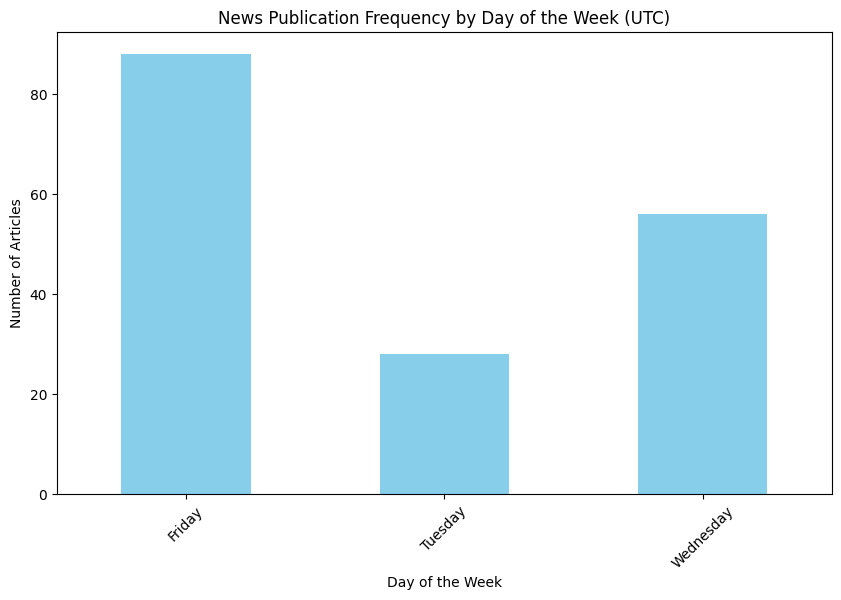

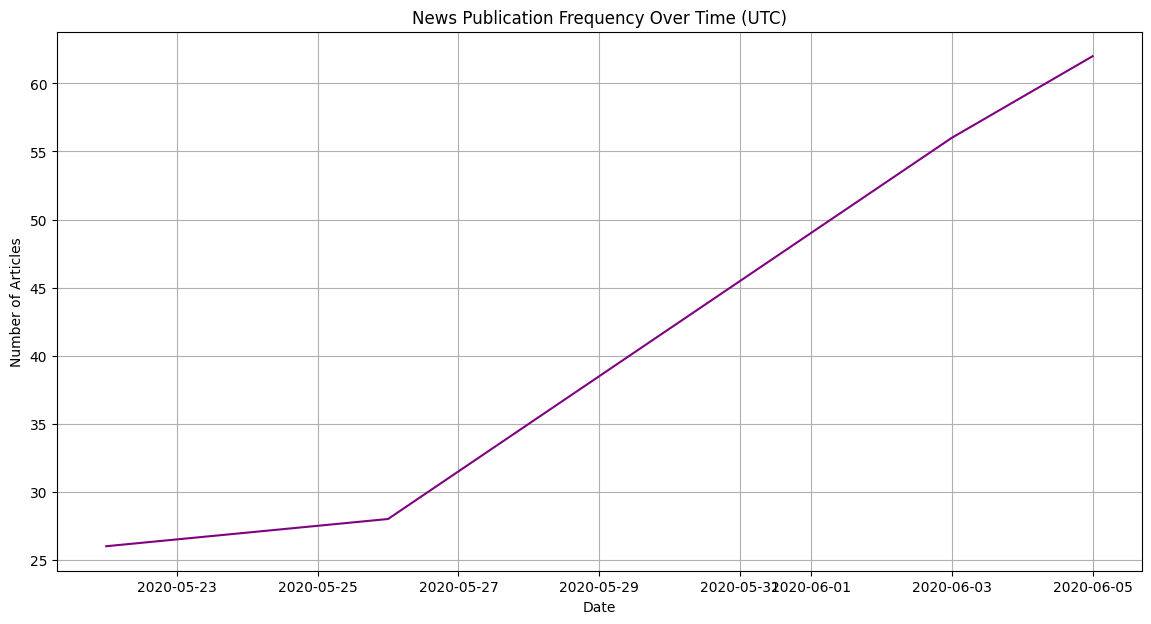

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser

# Custom parser to handle mixed formats
def parse_dates(date_str):
    try:
        return parser.parse(date_str)
    except Exception as e:
        print(f"Error parsing date: {date_str} | Error: {e}")
        return pd.NaT  # Return Not-a-Time (NaT) for any unparsable date

# Load the dataset
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

# Parse the 'date' column with the custom parser
df['date'] = df['date'].apply(parse_dates)

# Ensure the 'date' column is datetime and drop rows with any unparsable dates
df = df.dropna(subset=['date'])
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows again that might still have NaT after conversion
df = df.dropna(subset=['date'])

# Convert all times to UTC (this only works if the datetime objects are timezone aware)
if df['date'].dt.tz is None:
    df['date'] = df['date'].dt.tz_localize('UTC')
else:
    df['date'] = df['date'].dt.tz_convert('UTC')

# Extract day of the week and date components
df['day_of_week'] = df['date'].dt.day_name()  # Get the day name (e.g., 'Monday')
df['date_only'] = df['date'].dt.date  # Get only the date part without time

# Group by day of the week to see frequency of publications
day_of_week_count = df['day_of_week'].value_counts().sort_index()

# Plotting the frequency of publications by day of the week
plt.figure(figsize=(10, 6))
day_of_week_count.plot(kind='bar', color='skyblue')
plt.title('News Publication Frequency by Day of the Week (UTC)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Group by date to see frequency of publications over time
date_count = df['date_only'].value_counts().sort_index()

# Plotting the frequency of publications over time
plt.figure(figsize=(14, 7))
date_count.plot(kind='line', color='purple')
plt.title('News Publication Frequency Over Time (UTC)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()